In [17]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('/Users/apple/Desktop/Advanced Project 2/tradimo_ap.db')

df = pd.read_sql_query("SELECT * FROM futures WHERE commodity_id = 'PA' AND exp_month_id = 'U' AND exp_year = '1990' ORDER BY date;", cnx)
df

date commodity_id exp_month_id exp_year    open    high     low  \
0    1989-05-26           PA            U     1990  144.25  144.25  143.90   
1    1989-05-30           PA            U     1990  141.00  141.00  141.00   
2    1989-05-31           PA            U     1990  142.00  142.00  138.40   
3    1989-06-01           PA            U     1990  140.95  140.95  140.95   
4    1989-06-02           PA            U     1990  146.95  146.95  146.95   
..          ...          ...          ...      ...     ...     ...     ...   
330  1990-09-19           PA            U     1990  103.75  103.75  103.75   
331  1990-09-20           PA            U     1990  104.75  104.75  102.20   
332  1990-09-21           PA            U     1990  100.00  100.10  100.00   
333  1990-09-24           PA            U     1990  100.75  100.75  100.75   
334  1990-09-25           PA            U     1990  101.40  101.40  101.40   

      close  volume  openint  
0    143.90      36       26  
1    141.00      20       21  
2    138.40       2       23  
3    140.95       0       23  
4    146.95      23       24  
..      ...     ...      ...  
330  103.75      19        7  
331  102.20       4       40  
332  100.10       1       26  
333  100.75       0        8  
334  101.40       0        0  

[335 rows x 10 columns]

In [629]:
import plotly.offline as pyo
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode()
import plotly.express as px
import pandas as pd
from matplotlib.pyplot import figure
df = df.set_index('date')
df

index commodity_id exp_month_id exp_year    open   high     low  \
date                                                                          
2014-09-24      0            W            H     2017  563.00  563.0  563.00   
2014-09-25      1            W            H     2017  557.50  557.5  557.50   
2014-09-26      2            W            H     2017  555.00  555.0  555.00   
2014-09-29      3            W            H     2017  558.00  558.0  558.00   
2014-09-30      4            W            H     2017  556.50  556.5  556.50   
...           ...          ...          ...      ...     ...    ...     ...   
2017-03-08    612            W            H     2017  431.50  431.5  426.00   
2017-03-09    613            W            H     2017  432.00  432.5  425.00   
2017-03-10    614            W            H     2017  428.00  428.0  423.75   
2017-03-13    615            W            H     2017  419.50  419.5  412.50   
2017-03-14    616            W            H     2017  412.25  413.0  412.00   

             close  volume  openint  ...  DIFF2  DIFF3  DIFF14         SMA  \
date                                 ...                                     
2014-09-24  563.00       0        0  ...  -4.25  -9.50  -55.00  589.000000   
2014-09-25  557.50       0        0  ...  -5.75  -9.75  -63.75  584.446429   
2014-09-26  555.00       0        0  ...  -8.00  -8.25  -65.00  579.803571   
2014-09-29  558.00       0        0  ...   0.50  -5.00  -53.75  575.964286   
2014-09-30  556.50       0        0  ...   1.50  -1.00  -48.75  572.482143   
...            ...     ...      ...  ...    ...    ...     ...         ...   
2017-03-08  427.50     189      276  ... -10.75  -6.25  -27.25  434.410714   
2017-03-09  426.00      27      171  ... -10.00 -12.25  -21.75  432.857143   
2017-03-10  422.75      14       37  ...  -4.75 -13.25  -18.25  431.553571   
2017-03-13  412.25      49       18  ... -13.75 -15.25  -23.75  429.857143   
2017-03-14  412.00      88       37  ... -10.75 -14.00  -29.25  427.767857   

                   EMA       MACD    MACDSIG  MACDHIST  TREND  Groundtruth  
date                                                                        
2014-09-24  586.694168 -20.563958 -16.241315 -4.322643      0            2  
2014-09-25  582.801612 -21.374759 -17.268003 -4.106756      0            2  
2014-09-26  579.094731 -22.020292 -18.218461 -3.801831      1            2  
2014-09-29  576.282100 -22.147787 -19.004326 -3.143460      0            2  
2014-09-30  573.644487 -22.163860 -19.636233 -2.527627      1            2  
...                ...        ...        ...       ...    ...          ...  
2017-03-08  433.898565   1.182081   2.464750 -1.282669      0            2  
2017-03-09  432.845423   0.562261   2.084252 -1.521992      0            2  
2017-03-10  431.499367  -0.168753   1.633651 -1.802404      0            2  
2017-03-13  428.932785  -1.482553   1.010410 -2.492964      0            2  
2017-03-14  426.675080  -2.552172   0.297894 -2.850066      0            2  

[617 rows x 22 columns]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



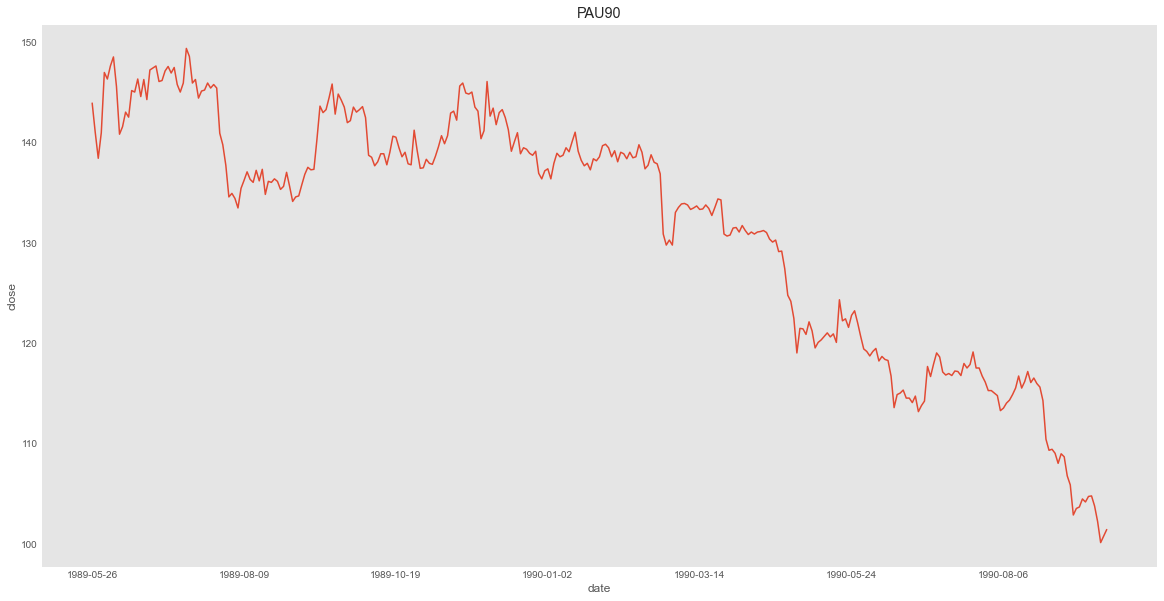

In [20]:
#import seaborn as sns
#sns.set(rc={'figure.figsize':(20, 10)})
df.close.plot(figsize =(20,10))
plt.xlabel('date')
plt.ylabel('close')
plt.title('PAU90')
plt.grid()
plt.style.use('ggplot')
plt.show()

In [4]:
import talib as ta
df['RSI'] = ta.RSI(df['close'].values, timeperiod = 14)
df['DIFF1'] = df['close'].diff().values
df['DIFF2'] = df['close'].diff(2).values
df['DIFF3'] = df['close'].diff(3).values
df['DIFF4'] = df['close'].diff(4).values

df.tail(20)

commodity_id exp_month_id exp_year    open    high     low   close  \
date                                                                            
1990-08-28           PA            U     1990  109.00  110.00  109.00  109.30   
1990-08-29           PA            U     1990  110.50  110.50  109.00  109.40   
1990-08-30           PA            U     1990  109.00  110.00  108.75  109.00   
1990-08-31           PA            U     1990  109.50  110.00  108.00  108.00   
1990-09-04           PA            U     1990  108.00  109.00  108.00  108.95   
1990-09-05           PA            U     1990  108.75  109.00  108.00  108.65   
1990-09-06           PA            U     1990  109.00  109.00  106.50  106.75   
1990-09-07           PA            U     1990  106.00  106.00  105.85  105.85   
1990-09-10           PA            U     1990  102.85  102.85  102.85  102.85   
1990-09-11           PA            U     1990  102.00  103.50  101.50  103.50   
1990-09-12           PA            U     1990  103.65  103.65  103.65  103.65   
1990-09-13           PA            U     1990  104.00  104.45  104.00  104.45   
1990-09-14           PA            U     1990  104.50  104.50  104.15  104.15   
1990-09-17           PA            U     1990  104.95  104.95  104.70  104.70   
1990-09-18           PA            U     1990  104.75  104.75  104.75  104.75   
1990-09-19           PA            U     1990  103.75  103.75  103.75  103.75   
1990-09-20           PA            U     1990  104.75  104.75  102.20  102.20   
1990-09-21           PA            U     1990  100.00  100.10  100.00  100.10   
1990-09-24           PA            U     1990  100.75  100.75  100.75  100.75   
1990-09-25           PA            U     1990  101.40  101.40  101.40  101.40   

            volume  openint        RSI  DIFF1  DIFF2  DIFF3  DIFF4  
date                                                                
1990-08-28     341     1300  27.232181  -1.10  -4.95  -6.30  -6.65  
1990-08-29     499      985  27.804347   0.10  -1.00  -4.85  -6.20  
1990-08-30     317      703  26.893441  -0.40  -0.30  -1.40  -5.25  
1990-08-31     291      685  24.713615  -1.00  -1.40  -1.30  -2.40  
1990-09-04     134      277  30.478650   0.95  -0.05  -0.45  -0.35  
1990-09-05     167      303  29.705082  -0.30   0.65  -0.35  -0.75  
1990-09-06      38      209  25.321670  -1.90  -2.20  -1.25  -2.25  
1990-09-07       3      195  23.549001  -0.90  -2.80  -3.10  -2.15  
1990-09-10       2      179  18.819574  -3.00  -3.90  -5.80  -6.10  
1990-09-11       6      135  22.453492   0.65  -2.35  -3.25  -5.15  
1990-09-12     117      121  23.306678   0.15   0.80  -2.20  -3.10  
1990-09-13       4      126  27.865060   0.80   0.95   1.60  -1.40  
1990-09-14       1        8  27.211887  -0.30   0.50   0.65   1.30  
1990-09-17       2        5  30.431521   0.55   0.25   1.05   1.20  
1990-09-18       0        4  30.731488   0.05   0.60   0.30   1.10  
1990-09-19      19        7  28.119982  -1.00  -0.95  -0.40  -0.70  
1990-09-20       4       40  24.626726  -1.55  -2.55  -2.50  -1.95  
1990-09-21       1       26  20.847950  -2.10  -3.65  -4.65  -4.60  
1990-09-24       0        8  24.699378   0.65  -1.45  -3.00  -4.00  
1990-09-25       0        0  28.448774   0.65   1.30  -0.80  -2.35

In [5]:
df['TREND'] = np.where(df.close.shift(-1) > df.close, 1,0)
df.head(20)

commodity_id exp_month_id exp_year    open    high     low   close  \
date                                                                            
1989-05-26           PA            U     1990  144.25  144.25  143.90  143.90   
1989-05-30           PA            U     1990  141.00  141.00  141.00  141.00   
1989-05-31           PA            U     1990  142.00  142.00  138.40  138.40   
1989-06-01           PA            U     1990  140.95  140.95  140.95  140.95   
1989-06-02           PA            U     1990  146.95  146.95  146.95  146.95   
1989-06-05           PA            U     1990  146.30  146.30  146.30  146.30   
1989-06-06           PA            U     1990  149.00  149.00  147.60  147.60   
1989-06-07           PA            U     1990  148.50  148.50  148.50  148.50   
1989-06-08           PA            U     1990  145.55  145.55  145.55  145.55   
1989-06-09           PA            U     1990  146.00  146.00  140.80  140.80   
1989-06-12           PA            U     1990  141.55  141.55  141.55  141.55   
1989-06-13           PA            U     1990  143.00  143.00  143.00  143.00   
1989-06-14           PA            U     1990  142.50  142.50  142.50  142.50   
1989-06-15           PA            U     1990  145.15  145.15  145.15  145.15   
1989-06-16           PA            U     1990  147.00  147.00  145.00  145.00   
1989-06-19           PA            U     1990  146.30  146.30  146.30  146.30   
1989-06-20           PA            U     1990  144.55  144.55  144.55  144.55   
1989-06-21           PA            U     1990  146.75  146.75  146.25  146.25   
1989-06-22           PA            U     1990  144.25  144.25  144.25  144.25   
1989-06-23           PA            U     1990  147.20  147.20  147.20  147.20   

            volume  openint        RSI  DIFF1  DIFF2  DIFF3  DIFF4  TREND  
date                                                                       
1989-05-26      36       26        NaN    NaN    NaN    NaN    NaN      0  
1989-05-30      20       21        NaN  -2.90    NaN    NaN    NaN      0  
1989-05-31       2       23        NaN  -2.60  -5.50    NaN    NaN      1  
1989-06-01       0       23        NaN   2.55  -0.05  -2.95    NaN      1  
1989-06-02      23       24        NaN   6.00   8.55   5.95   3.05      0  
1989-06-05       0       21        NaN  -0.65   5.35   7.90   5.30      1  
1989-06-06       2       23        NaN   1.30   0.65   6.65   9.20      1  
1989-06-07       0       22        NaN   0.90   2.20   1.55   7.55      0  
1989-06-08       0       22        NaN  -2.95  -2.05  -0.75  -1.40      0  
1989-06-09       2       24        NaN  -4.75  -7.70  -6.80  -5.50      1  
1989-06-12       0       24        NaN   0.75  -4.00  -6.95  -6.05      1  
1989-06-13       0       24        NaN   1.45   2.20  -2.55  -5.50      0  
1989-06-14       0       24        NaN  -0.50   0.95   1.70  -3.05      1  
1989-06-15       0       24        NaN   2.65   2.15   3.60   4.35      0  
1989-06-16      26       35  51.827243  -0.15   2.50   2.00   3.45      1  
1989-06-19       0       35  53.968254   1.30   1.15   3.80   3.30      0  
1989-06-20       0       35  50.701491  -1.75  -0.45  -0.60   2.05      1  
1989-06-21       1       36  53.637400   1.70  -0.05   1.25   1.10      0  
1989-06-22       0       36  49.874255  -2.00  -0.30  -2.05  -0.75      1  
1989-06-23       0       36  54.900375   2.95   0.95   2.65   0.90      1

In [6]:
df.dropna(inplace = True)
predictors_list = ['RSI', 'DIFF1', 'DIFF2', 'DIFF3', 'DIFF4']
X = df[predictors_list]
y = df.TREND

y.tail()

date
1990-09-19    0
1990-09-20    0
1990-09-21    1
1990-09-24    1
1990-09-25    0
Name: TREND, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42, stratify =y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(224, 5) (224,)
(97, 5) (97,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion ='gini', max_depth =5 , min_samples_leaf = 3)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
clf = clf.fit(X_train, y_train)


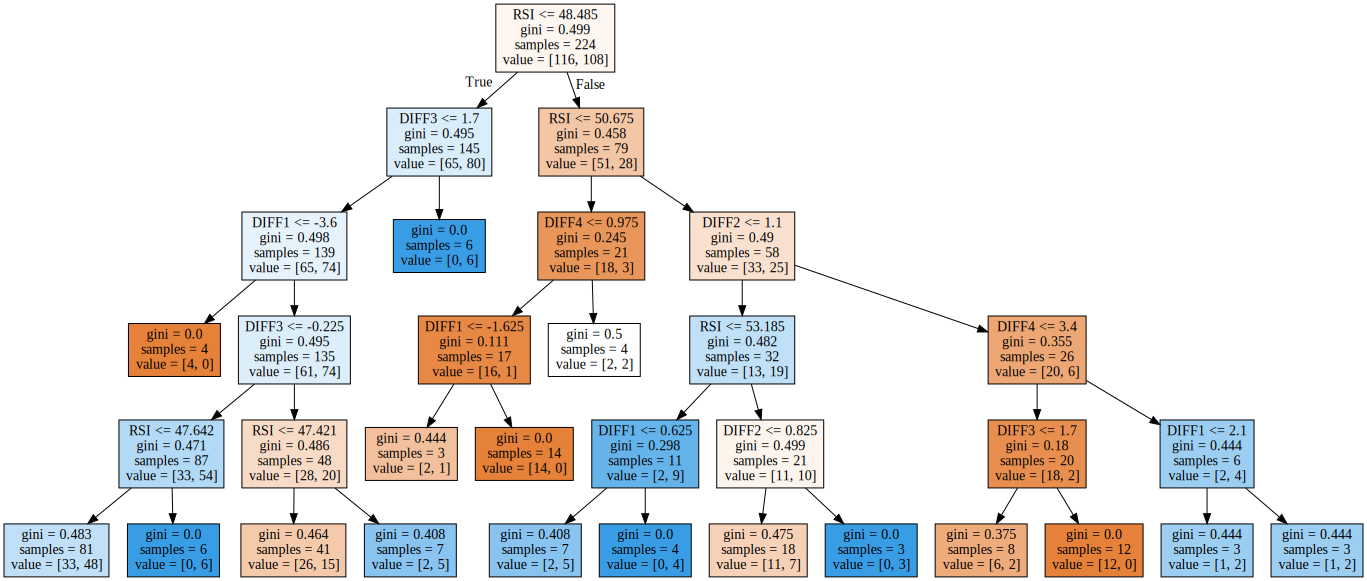

In [10]:
from sklearn import tree 
import graphviz

dot_data = tree.export_graphviz(clf, out_file =None, filled =True, feature_names = predictors_list)
graphviz.Source(dot_data)

[Text(289.7307692307692, 348.81, 'X[0] <= 48.485\ngini = 0.499\nsamples = 224\nvalue = [116, 108]'),
 Text(128.76923076923077, 285.39, 'X[3] <= 1.7\ngini = 0.495\nsamples = 145\nvalue = [65, 80]'),
 Text(96.57692307692308, 221.97, 'X[1] <= -3.6\ngini = 0.498\nsamples = 139\nvalue = [65, 74]'),
 Text(64.38461538461539, 158.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(128.76923076923077, 158.55, 'X[3] <= -0.225\ngini = 0.495\nsamples = 135\nvalue = [61, 74]'),
 Text(64.38461538461539, 95.13, 'X[0] <= 47.642\ngini = 0.471\nsamples = 87\nvalue = [33, 54]'),
 Text(32.19230769230769, 31.710000000000036, 'gini = 0.483\nsamples = 81\nvalue = [33, 48]'),
 Text(96.57692307692308, 31.710000000000036, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(193.15384615384616, 95.13, 'X[0] <= 47.421\ngini = 0.486\nsamples = 48\nvalue = [28, 20]'),
 Text(160.96153846153845, 31.710000000000036, 'gini = 0.464\nsamples = 41\nvalue = [26, 15]'),
 Text(225.34615384615387, 31.710000000000036, 'gini = 0

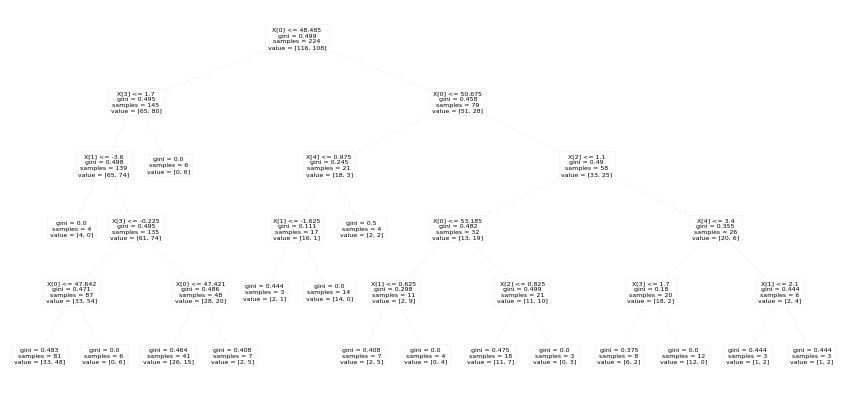

In [11]:
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(clf)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.50      0.54        50
           1       0.55      0.64      0.59        47

    accuracy                           0.57        97
   macro avg       0.57      0.57      0.57        97
weighted avg       0.57      0.57      0.57        97



In [14]:
df.tail(100)

commodity_id exp_month_id exp_year    open    high     low   close  \
date                                                                            
1990-05-03           PA            U     1990  120.00  120.90  120.00  120.85   
1990-05-04           PA            U     1990  121.50  122.85  121.50  122.10   
1990-05-07           PA            U     1990  121.75  122.00  121.10  121.20   
1990-05-08           PA            U     1990  121.00  121.75  119.50  119.50   
1990-05-09           PA            U     1990  119.50  120.25  119.00  120.05   
...                 ...          ...      ...     ...     ...     ...     ...   
1990-09-19           PA            U     1990  103.75  103.75  103.75  103.75   
1990-09-20           PA            U     1990  104.75  104.75  102.20  102.20   
1990-09-21           PA            U     1990  100.00  100.10  100.00  100.10   
1990-09-24           PA            U     1990  100.75  100.75  100.75  100.75   
1990-09-25           PA            U     1990  101.40  101.40  101.40  101.40   

            volume  openint        RSI  DIFF1  DIFF2  DIFF3  DIFF4  TREND  
date                                                                       
1990-05-03      84     1489  24.070010  -0.55  -0.60   1.85  -1.60      1  
1990-05-04      47     1517  30.937938   1.25   0.70   0.65   3.10      0  
1990-05-07     105     1565  28.910336  -0.90   0.35  -0.20  -0.25      0  
1990-05-08     197     1650  25.509509  -1.70  -2.60  -1.35  -1.90      1  
1990-05-09      44     1665  28.442333   0.55  -1.15  -2.05  -0.80      1  
...            ...      ...        ...    ...    ...    ...    ...    ...  
1990-09-19      19        7  28.119982  -1.00  -0.95  -0.40  -0.70      0  
1990-09-20       4       40  24.626726  -1.55  -2.55  -2.50  -1.95      0  
1990-09-21       1       26  20.847950  -2.10  -3.65  -4.65  -4.60      1  
1990-09-24       0        8  24.699378   0.65  -1.45  -3.00  -4.00      1  
1990-09-25       0        0  28.448774   0.65   1.30  -0.80  -2.35      0  

[100 rows x 15 columns]

In [15]:
conditions = [(df['RSI'] <=20) & (df['RSI']>0),
              (df['RSI'] >=65) & (df['RSI']<100),
              (df['RSI'] <=30) & (df['RSI']>20),
              (df['RSI'] >30) & (df['RSI'] <50),
              (df['RSI'] >=50) & (df['RSI']<65)]

values = ['Strong Buy', 'Strong Sell', 'Buy', 'Neutral', 'Sell']

df['Groundtruth'] = np.select(conditions,values)

df.tail(300)
        

commodity_id exp_month_id exp_year    open    high     low   close  \
date                                                                            
1989-07-19           PA            U     1990  144.40  144.40  144.40  144.40   
1989-07-20           PA            U     1990  145.50  145.50  145.10  145.10   
1989-07-21           PA            U     1990  145.20  145.20  145.20  145.20   
1989-07-24           PA            U     1990  145.90  145.90  145.90  145.90   
1989-07-25           PA            U     1990  145.40  145.40  145.40  145.40   
...                 ...          ...      ...     ...     ...     ...     ...   
1990-09-19           PA            U     1990  103.75  103.75  103.75  103.75   
1990-09-20           PA            U     1990  104.75  104.75  102.20  102.20   
1990-09-21           PA            U     1990  100.00  100.10  100.00  100.10   
1990-09-24           PA            U     1990  100.75  100.75  100.75  100.75   
1990-09-25           PA            U     1990  101.40  101.40  101.40  101.40   

            volume  openint        RSI  DIFF1  DIFF2  DIFF3  DIFF4  TREND  \
date                                                                        
1989-07-19       0       84  45.952943  -1.85  -1.50  -4.15  -4.95      1   
1989-07-20       5       89  47.842371   0.70  -1.15  -0.80  -3.45      1   
1989-07-21       0       89  48.121389   0.10   0.80  -1.05  -0.70      1   
1989-07-24       0       89  50.132410   0.70   0.80   1.50  -0.35      0   
1989-07-25       0       89  48.680824  -0.50   0.20   0.30   1.00      1   
...            ...      ...        ...    ...    ...    ...    ...    ...   
1990-09-19      19        7  28.119982  -1.00  -0.95  -0.40  -0.70      0   
1990-09-20       4       40  24.626726  -1.55  -2.55  -2.50  -1.95      0   
1990-09-21       1       26  20.847950  -2.10  -3.65  -4.65  -4.60      1   
1990-09-24       0        8  24.699378   0.65  -1.45  -3.00  -4.00      1   
1990-09-25       0        0  28.448774   0.65   1.30  -0.80  -2.35      0   

           Groundtruth  
date                    
1989-07-19     Neutral  
1989-07-20     Neutral  
1989-07-21     Neutral  
1989-07-24        Sell  
1989-07-25     Neutral  
...                ...  
1990-09-19         Buy  
1990-09-20         Buy  
1990-09-21         Buy  
1990-09-24         Buy  
1990-09-25         Buy  

[300 rows x 16 columns]

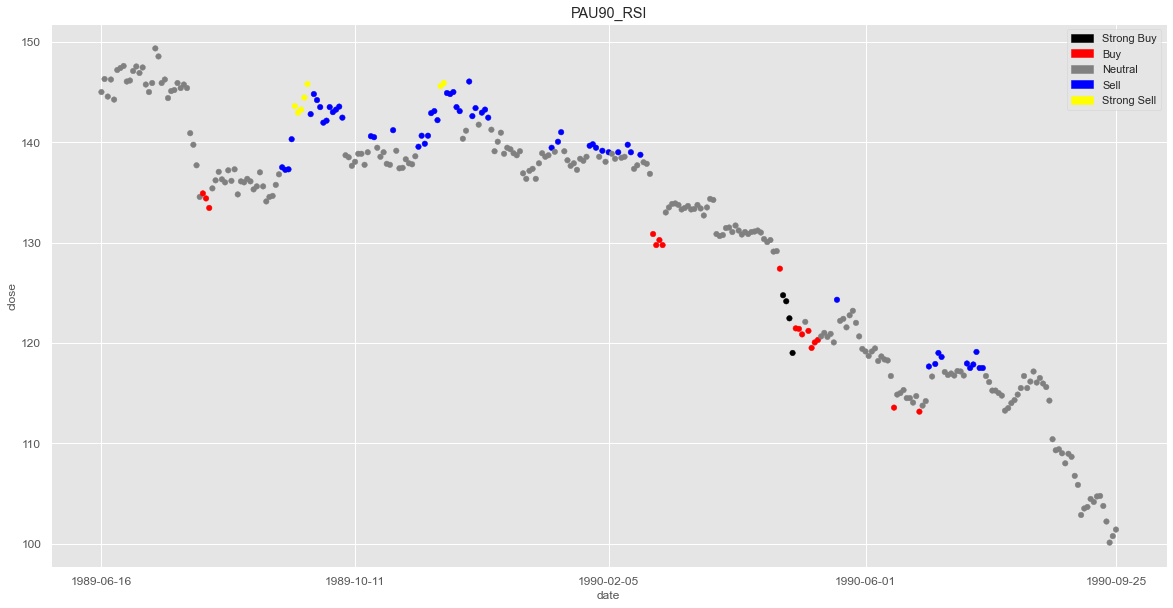

In [23]:
import seaborn as sns
import matplotlib.cbook as cbook
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})
#df = df.reset_index()
date = df['date']
close = df['close']
groundtruth = df['Groundtruth']


plt.style.use('ggplot')
xtick = len(df.date)
x_min = df.date[0]
x_75 = (75 * xtick)/100
X_75 = round(x_75)
x_25 = (25* xtick)/100
X_25 = round(x_25)
x_50 = (50*xtick)/100
X_50 = round(x_50)
x_min = df.date[0]
x_25m = df.date[0 + X_25]
x_50m = df.date[0 + X_50]
x_75m = df.date[0+ X_75]
x_max = df.date[xtick - 1]
n = round(xtick/20)
for date in range (0,n):
    df.loc[date, 'Groundtruth'] = '2' #first n days neutral
for date in range (xtick-n,xtick):
    df.loc[date, 'Groundtruth'] = '2' #last n days neutral

#df1 = pd.DataFrame(dict(date = date, close = close , groundtruth = groundtruth))
colors = ['blue' if Groundtruth == 'Sell' else 'red' if Groundtruth == 'Buy' else 'yellow' if Groundtruth == 'Strong Sell' 
          else 'black' if Groundtruth == 'Strong Buy' else 'gray' for Groundtruth in df.Groundtruth]

df.plot(x = 'date' , y= 'close' , kind= 'scatter' , s = 30 , #c = 'Groundtruth', 
        color = colors ,title = 'PAU90_RSI' , grid = True ,fontsize= 12, xticks = [x_min, x_25m, x_50m, x_75m, x_max] , stacked = True)

red_patch = mpatches.Patch(color='red' ,label='Buy')
blue_patch = mpatches.Patch(color ='blue', label='Sell')
black_patch = mpatches.Patch(color = 'black', label ="Strong Buy")
yellow_patch = mpatches.Patch(color ="yellow", label = "Strong Sell")
gray_patch = mpatches.Patch(color = "gray", label ="Neutral")
plt.legend(handles=[black_patch, red_patch, gray_patch, blue_patch , yellow_patch], loc="best")
plt.savefig('/Users/apple/Desktop/PAU90_RSI', dpi=300, bbox_inches='tight')

In [911]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [1152]:
df1 = pd.read_sql_query("SELECT * FROM futures WHERE commodity_id = 'C' AND exp_month_id = 'Z' AND exp_year = '2015' ORDER BY date;", cnx)
df1

date commodity_id exp_month_id exp_year    open    high     low  \
0    2011-12-14            C            Z     2015  366.33  549.50  366.33   
1    2011-12-15            C            Z     2015  545.00  550.25  545.00   
2    2011-12-16            C            Z     2015  371.00  556.50  371.00   
3    2011-12-19            C            Z     2015  555.00  559.00  555.00   
4    2011-12-20            C            Z     2015  374.67  562.00  374.67   
..          ...          ...          ...      ...     ...     ...     ...   
993  2015-12-04            C            Z     2015  370.00  376.50  369.75   
994  2015-12-07            C            Z     2015  375.75  376.00  368.00   
995  2015-12-08            C            Z     2015  369.00  371.00  367.25   
996  2015-12-10            C            Z     2015  372.50  379.25  371.75   
997  2015-12-14            C            Z     2015  373.50  381.75  373.50   

      close  volume  openint  
0    549.50       0        0  
1    550.25       7        0  
2    556.50       0        7  
3    559.00       1        7  
4    562.00       0        8  
..      ...     ...      ...  
993  376.25    4819    11442  
994  368.50    3271     9503  
995  370.00    2947     7935  
996  377.25    2543     4444  
997  381.75     903      816  

[998 rows x 10 columns]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



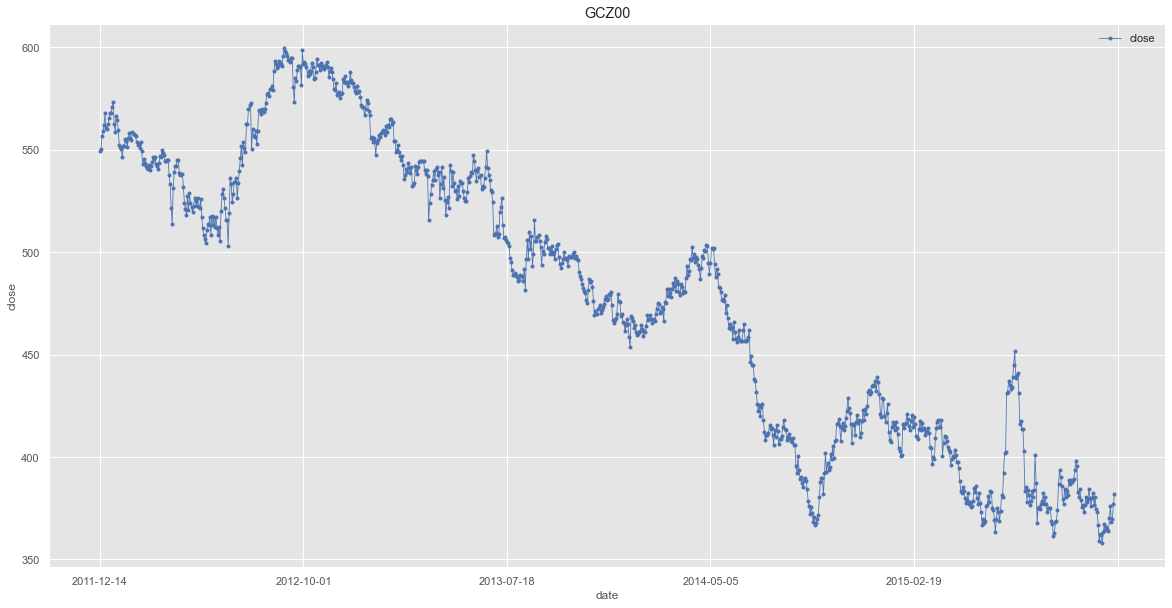

In [1155]:
df1.reset_index()
#df1 = df1.set_index('date')
df1['close'].plot(linewidth = 0.8, marker = '.' , color = 'b' ,linestyle = '-', label = 'close', legend = True,  title = 'GCZ00');
plt.ylabel('close')
plt.savefig('/Users/apple/Desktop/CZ15.jpg', dpi=300, bbox_inches='tight')


In [1156]:
data = df1.filter(['close'])
dataset = data.values
len(dataset)

998

In [933]:
import math
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

524

In [934]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.74757282],
       [0.65533981],
       [0.64320388],
       [0.67839806],
       [0.63470874],
       [0.58980583],
       [0.57645631],
       [0.63470874],
       [0.62135922],
       [0.6723301 ],
       [0.73058252],
       [0.73058252],
       [0.75121359],
       [0.73058252],
       [0.84223301],
       [0.7961165 ],
       [0.84830097],
       [0.91626214],
       [0.87135922],
       [0.86893204],
       [0.88592233],
       [0.78640777],
       [0.84101942],
       [0.83009709],
       [0.82281553],
       [0.84587379],
       [0.84830097],
       [0.83373786],
       [0.8131068 ],
       [0.82038835],
       [0.79368932],
       [0.79126214],
       [0.81067961],
       [0.79490291],
       [0.74514563],
       [0.73058252],
       [0.7342233 ],
       [0.76334951],
       [0.82160194],
       [0.8288835 ],
       [0.80461165],
       [0.78883495],
       [0.75728155],
       [0.77063107],
       [0.76456311],
       [0.78276699],
       [0.76699029],
       [0.766

In [935]:
train_data = scaled_data[0:training_data_size,:]
x_train =[]
y_train =[]
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i<=30:
        print(x_train)
        print(y_train)

[array([0.74757282, 0.65533981, 0.64320388, 0.67839806, 0.63470874,
       0.58980583, 0.57645631, 0.63470874, 0.62135922, 0.6723301 ,
       0.73058252, 0.73058252, 0.75121359, 0.73058252, 0.84223301,
       0.7961165 , 0.84830097, 0.91626214, 0.87135922, 0.86893204,
       0.88592233, 0.78640777, 0.84101942, 0.83009709, 0.82281553,
       0.84587379, 0.84830097, 0.83373786, 0.8131068 , 0.82038835])]
[0.7936893203883493]


In [936]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(494, 30, 1)

In [937]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [938]:
model.fit(x_train, Y_train, batch_size = 32, epochs = 30)

Epoch 1/30
16/16 [==============================] - 1s 40ms/step - loss: 0.0762
Epoch 2/30
16/16 [==============================] - 1s 32ms/step - loss: 0.0147
Epoch 3/30
16/16 [==============================] - 1s 38ms/step - loss: 0.0088
Epoch 4/30
16/16 [==============================] - 1s 37ms/step - loss: 0.0075
Epoch 5/30
16/16 [==============================] - 1s 33ms/step - loss: 0.0065
Epoch 6/30
16/16 [==============================] - 1s 32ms/step - loss: 0.0061
Epoch 7/30
16/16 [==============================] - 1s 32ms/step - loss: 0.0060
Epoch 8/30
16/16 [==============================] - 0s 31ms/step - loss: 0.0058
Epoch 9/30
16/16 [==============================] - 0s 30ms/step - loss: 0.0054
Epoch 10/30
16/16 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 11/30
16/16 [==============================] - 1s 31ms/step - loss: 0.0047
Epoch 12/30
16/16 [==============================] - 0s 31ms/step - loss: 0.0045
Epoch 13/30
16/16 [==================

In [939]:
test_data = scaled_data[training_data_size - 30:, :]
x_test = []
y_test = dataset[training_data_size:,:]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [940]:
df1.reset_index()
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [941]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [942]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.2353107997349326

<ipython-input-948-43e21a0f06c0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



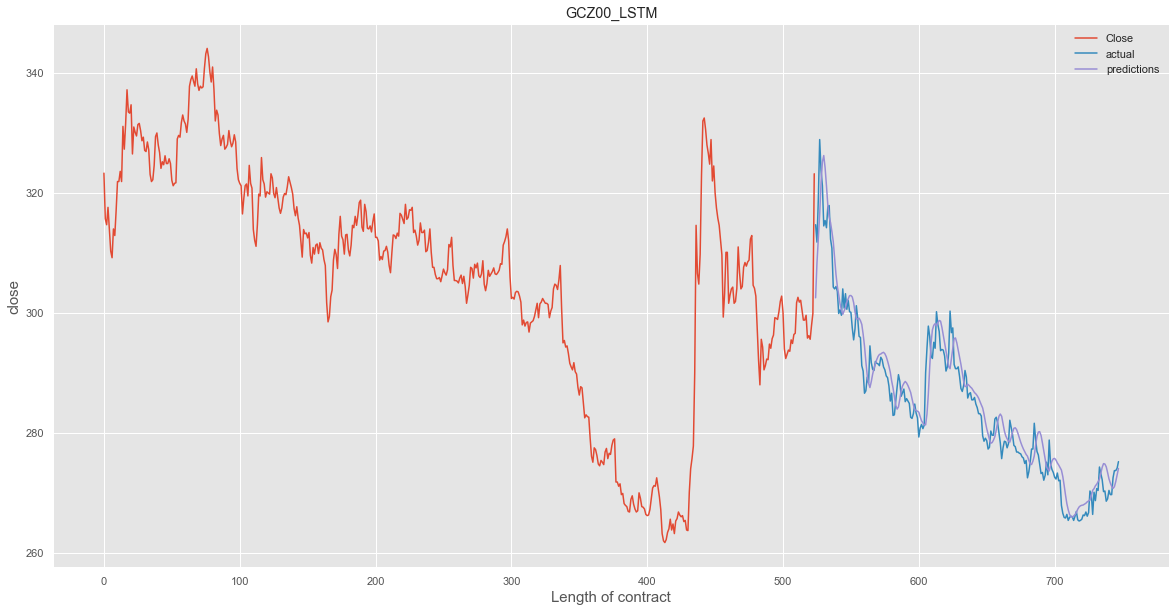

In [948]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize = (20,10))
plt.title('GCZ00_LSTM')
plt.xlabel('Length of contract', fontsize = 15)
plt.ylabel('close', fontsize =15)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Close','actual','predictions'], loc='best')
plt.savefig('/Users/apple/Desktop/GCZ00LSTM.jpg', dpi=300, bbox_inches='tight')

In [1229]:
df2 = pd.read_sql_query("SELECT * FROM futures WHERE commodity_id = 'C' AND exp_month_id = 'Z' AND exp_year = '2015' ORDER BY date;", cnx)

In [1230]:
df2

date commodity_id exp_month_id exp_year    open    high     low  \
0    2011-12-14            C            Z     2015  366.33  549.50  366.33   
1    2011-12-15            C            Z     2015  545.00  550.25  545.00   
2    2011-12-16            C            Z     2015  371.00  556.50  371.00   
3    2011-12-19            C            Z     2015  555.00  559.00  555.00   
4    2011-12-20            C            Z     2015  374.67  562.00  374.67   
..          ...          ...          ...      ...     ...     ...     ...   
993  2015-12-04            C            Z     2015  370.00  376.50  369.75   
994  2015-12-07            C            Z     2015  375.75  376.00  368.00   
995  2015-12-08            C            Z     2015  369.00  371.00  367.25   
996  2015-12-10            C            Z     2015  372.50  379.25  371.75   
997  2015-12-14            C            Z     2015  373.50  381.75  373.50   

      close  volume  openint  
0    549.50       0        0  
1    550.25       7        0  
2    556.50       0        7  
3    559.00       1        7  
4    562.00       0        8  
..      ...     ...      ...  
993  376.25    4819    11442  
994  368.50    3271     9503  
995  370.00    2947     7935  
996  377.25    2543     4444  
997  381.75     903      816  

[998 rows x 10 columns]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



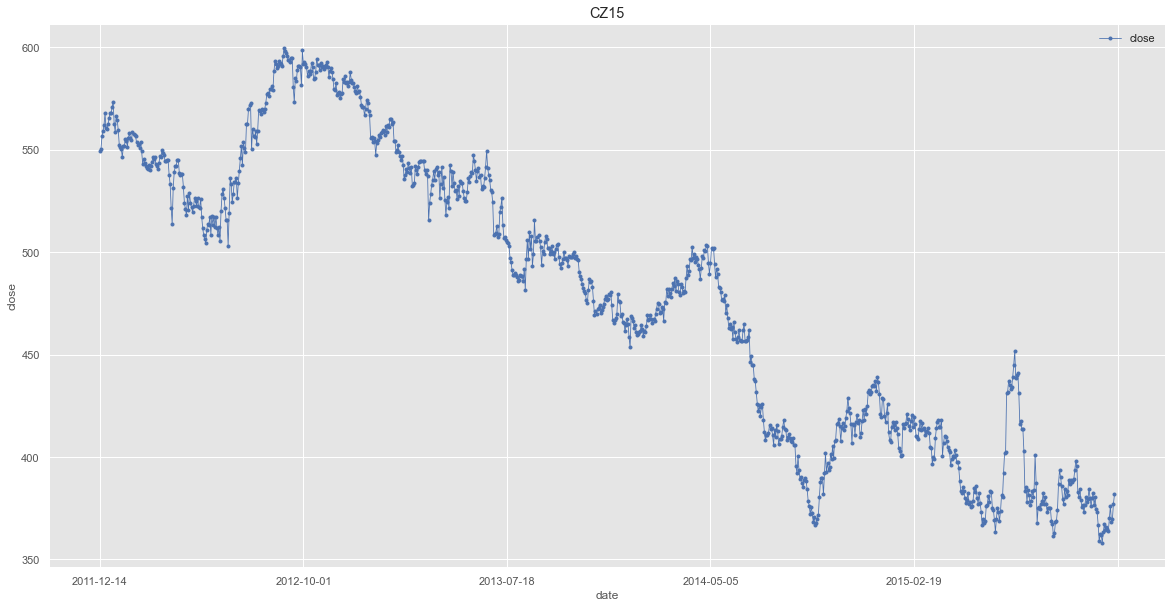

In [1231]:
#df2.reset_index()
df2 = df2.set_index('date')
df2['close'].plot(linewidth = 0.8, marker = '.' , color = 'b' ,linestyle = '-', label = 'close', legend = True,  title = 'CZ15');
plt.ylabel('close')
plt.savefig('/Users/apple/Desktop/CZ15.jpg', dpi=300, bbox_inches='tight')

In [1200]:
df2 = df2.reset_index()['close']
df2

0       68920.0
1       68420.0
2       67790.0
3       67930.0
4       68490.0
         ...   
1245    42390.0
1246    42400.0
1247    42130.0
1248    42220.0
1249    42020.0
Name: close, Length: 1250, dtype: float64

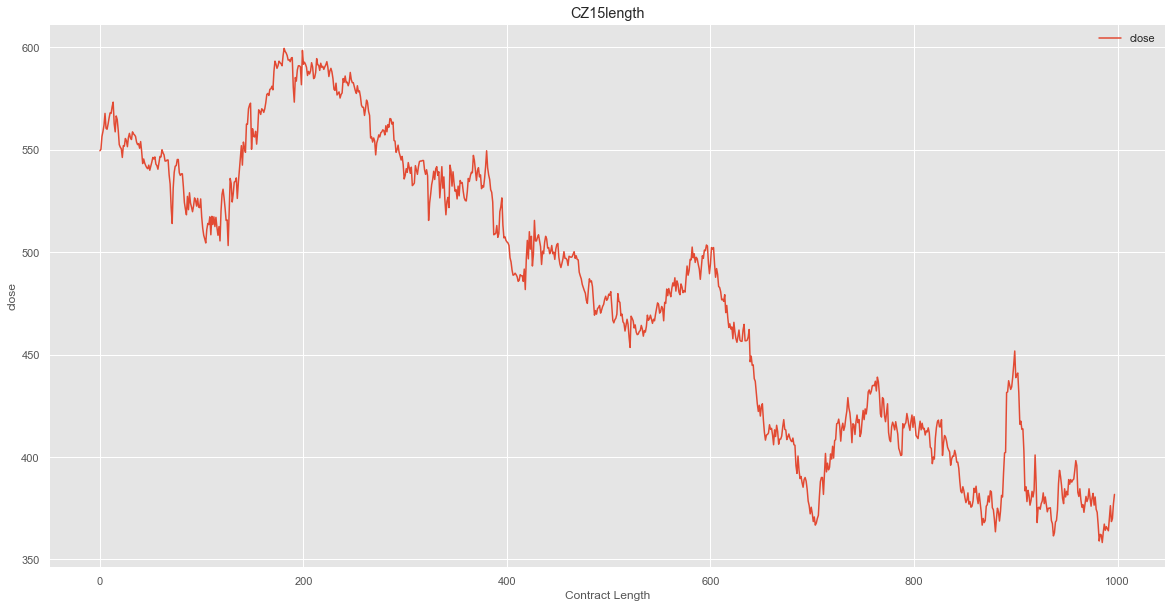

In [1161]:
plt.plot(df2)
plt.title('CZ15length')
plt.xlabel('Contract Length')
plt.ylabel('close')
plt.legend(['close'], loc='best')
plt.savefig('/Users/apple/Desktop/CZ15length.jpg', dpi=300, bbox_inches='tight')

In [1201]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [1202]:
print(df2)

[[0.9737221 ]
 [0.95572354]
 [0.93304536]
 ...
 [0.00935925]
 [0.01259899]
 [0.00539957]]


In [1203]:
training_size=int(len(df2)*0.65)#splitting dataset into train and test split
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [1204]:
training_size,test_size

(812, 438)

In [1205]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1206]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [1207]:
print(X_train.shape), print(y_train.shape)

(711, 100)
(711,)


(None, None)

In [1208]:
print(X_test.shape), print(ytest.shape)

(337, 100)
(337,)


(None, None)

In [1209]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [1210]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [1211]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [1212]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 100, 50)           10400     
_________________________________________________________________
lstm_113 (LSTM)              (None, 100, 50)           20200     
_________________________________________________________________
lstm_114 (LSTM)              (None, 50)                20200     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [1213]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 353ms/step - loss: 0.0683 - val_loss: 0.0037
Epoch 2/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0171 - val_loss: 0.0204
Epoch 3/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 5/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0070 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 10/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0059 - val_lo

12/12 [==============================] - 3s 213ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 82/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 83/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 84/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 86/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 88/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 89/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 90/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0014 - val_loss: 

In [1214]:
import tensorflow as tf
#prediction and performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [1215]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


56198.07408749621

In [1216]:
math.sqrt(mean_squared_error(ytest,test_predict))

48768.27544038481

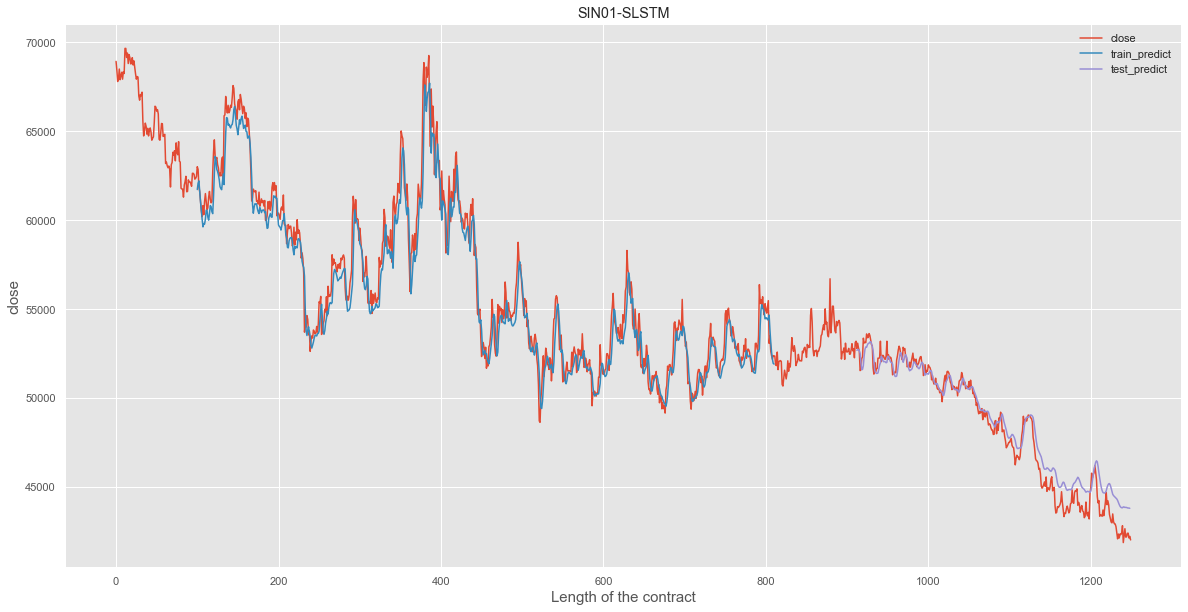

<Figure size 1440x720 with 0 Axes>

In [1217]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('SIN01-SLSTM')
plt.ylabel('close', fontsize = 15)
plt.xlabel('Length of the contract', fontsize = 15)
plt.legend(['close','train_predict','test_predict'], loc='best')
plt.show()
plt.savefig('/Users/apple/Desktop/SIN01-SLSTM.jpg', dpi=300, bbox_inches='tight')

In [1218]:
len(test_data)

438

In [1222]:
x_input=test_data[338:].reshape(1,-1)
x_input.shape

(1, 100)

In [1223]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1224]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.06739743]
101
1 day input [0.12886969 0.13318934 0.10475162 0.1087113  0.11159107 0.0737941
 0.05975522 0.0611951  0.07271418 0.07091433 0.07343413 0.07667387
 0.08279338 0.10295176 0.08135349 0.06695464 0.0525558  0.05975522
 0.05903528 0.0687545  0.0737941  0.06731461 0.06011519 0.0637149
 0.07847372 0.08027358 0.10655148 0.08135349 0.07955364 0.10115191
 0.10511159 0.10439165 0.1087113  0.07559395 0.08135349 0.07667387
 0.06155508 0.0712743  0.07487401 0.06407487 0.06227502 0.05039597
 0.05327574 0.08207343 0.05867531 0.05399568 0.0611951  0.04787617
 0.09935205 0.11087113 0.14038877 0.13066955 0.13714903 0.14146868
 0.15586753 0.1425486  0.12706983 0.09287257 0.08027358 0.0849532
 0.05327574 0.05615551 0.05507559 0.05327574 0.06587473 0.05435565
 0.06767459 0.08207343 0.10187185 0.07667387 0.08459323 0.07667387
 0.05687545 0.04895608 0.04175666 0.0399568  0.05795536 0.0424766
 0.03815695 0.03779698 0.03239741 0.02015839 0.0075594  0.01727862
 0.00935925 0.01727862 0.0161987  0.0

8 day output [[0.13671058]]
9 day input [0.07271418 0.07091433 0.07343413 0.07667387 0.08279338 0.10295176
 0.08135349 0.06695464 0.0525558  0.05975522 0.05903528 0.0687545
 0.0737941  0.06731461 0.06011519 0.0637149  0.07847372 0.08027358
 0.10655148 0.08135349 0.07955364 0.10115191 0.10511159 0.10439165
 0.1087113  0.07559395 0.08135349 0.07667387 0.06155508 0.0712743
 0.07487401 0.06407487 0.06227502 0.05039597 0.05327574 0.08207343
 0.05867531 0.05399568 0.0611951  0.04787617 0.09935205 0.11087113
 0.14038877 0.13066955 0.13714903 0.14146868 0.15586753 0.1425486
 0.12706983 0.09287257 0.08027358 0.0849532  0.05327574 0.05615551
 0.05507559 0.05327574 0.06587473 0.05435565 0.06767459 0.08207343
 0.10187185 0.07667387 0.08459323 0.07667387 0.05687545 0.04895608
 0.04175666 0.0399568  0.05795536 0.0424766  0.03815695 0.03779698
 0.03239741 0.02015839 0.0075594  0.01727862 0.00935925 0.01727862
 0.0161987  0.01943844 0.03419726 0.         0.01367891 0.02807775
 0.01115911 0.01151908 0.

17 day output [[0.18617281]]
18 day input [0.05975522 0.05903528 0.0687545  0.0737941  0.06731461 0.06011519
 0.0637149  0.07847372 0.08027358 0.10655148 0.08135349 0.07955364
 0.10115191 0.10511159 0.10439165 0.1087113  0.07559395 0.08135349
 0.07667387 0.06155508 0.0712743  0.07487401 0.06407487 0.06227502
 0.05039597 0.05327574 0.08207343 0.05867531 0.05399568 0.0611951
 0.04787617 0.09935205 0.11087113 0.14038877 0.13066955 0.13714903
 0.14146868 0.15586753 0.1425486  0.12706983 0.09287257 0.08027358
 0.0849532  0.05327574 0.05615551 0.05507559 0.05327574 0.06587473
 0.05435565 0.06767459 0.08207343 0.10187185 0.07667387 0.08459323
 0.07667387 0.05687545 0.04895608 0.04175666 0.0399568  0.05795536
 0.0424766  0.03815695 0.03779698 0.03239741 0.02015839 0.0075594
 0.01727862 0.00935925 0.01727862 0.0161987  0.01943844 0.03419726
 0.         0.01367891 0.02807775 0.01115911 0.01151908 0.0187185
 0.01907847 0.00935925 0.01259899 0.00539957 0.06739743 0.0711065
 0.07890332 0.08886879 0

26 day output [[0.21386954]]
27 day input [0.10655148 0.08135349 0.07955364 0.10115191 0.10511159 0.10439165
 0.1087113  0.07559395 0.08135349 0.07667387 0.06155508 0.0712743
 0.07487401 0.06407487 0.06227502 0.05039597 0.05327574 0.08207343
 0.05867531 0.05399568 0.0611951  0.04787617 0.09935205 0.11087113
 0.14038877 0.13066955 0.13714903 0.14146868 0.15586753 0.1425486
 0.12706983 0.09287257 0.08027358 0.0849532  0.05327574 0.05615551
 0.05507559 0.05327574 0.06587473 0.05435565 0.06767459 0.08207343
 0.10187185 0.07667387 0.08459323 0.07667387 0.05687545 0.04895608
 0.04175666 0.0399568  0.05795536 0.0424766  0.03815695 0.03779698
 0.03239741 0.02015839 0.0075594  0.01727862 0.00935925 0.01727862
 0.0161987  0.01943844 0.03419726 0.         0.01367891 0.02807775
 0.01115911 0.01151908 0.0187185  0.01907847 0.00935925 0.01259899
 0.00539957 0.06739743 0.0711065  0.07890332 0.08886879 0.0994848
 0.10986058 0.11958621 0.12853384 0.13671058 0.14417535 0.15100068
 0.1572586  0.16301608 

In [1225]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [1226]:
len(df2)

1250

Text(0, 0.5, 'close')

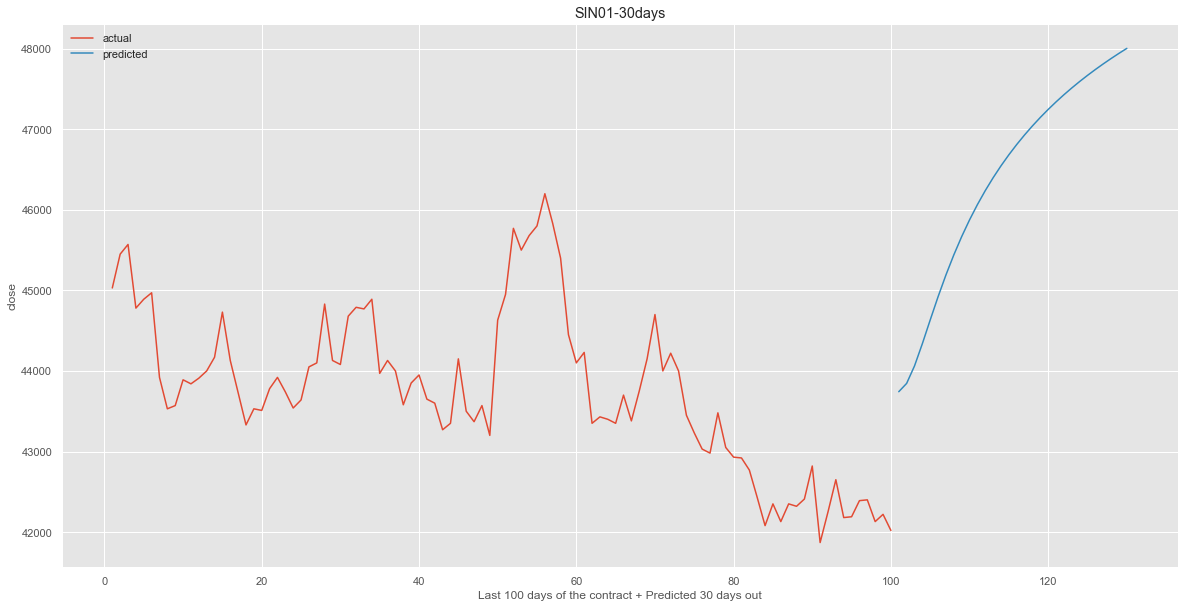

In [1227]:
plt.plot(day_new,scaler.inverse_transform(df2[1150:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('SIN01-30days')
plt.legend(['actual', 'predicted'], loc='best')
plt.xlabel('Last 100 days of the contract + Predicted 30 days out')
plt.ylabel('close')
#plt.savefig('/Users/apple/Desktop/CZ15-30days.jpg', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'close')

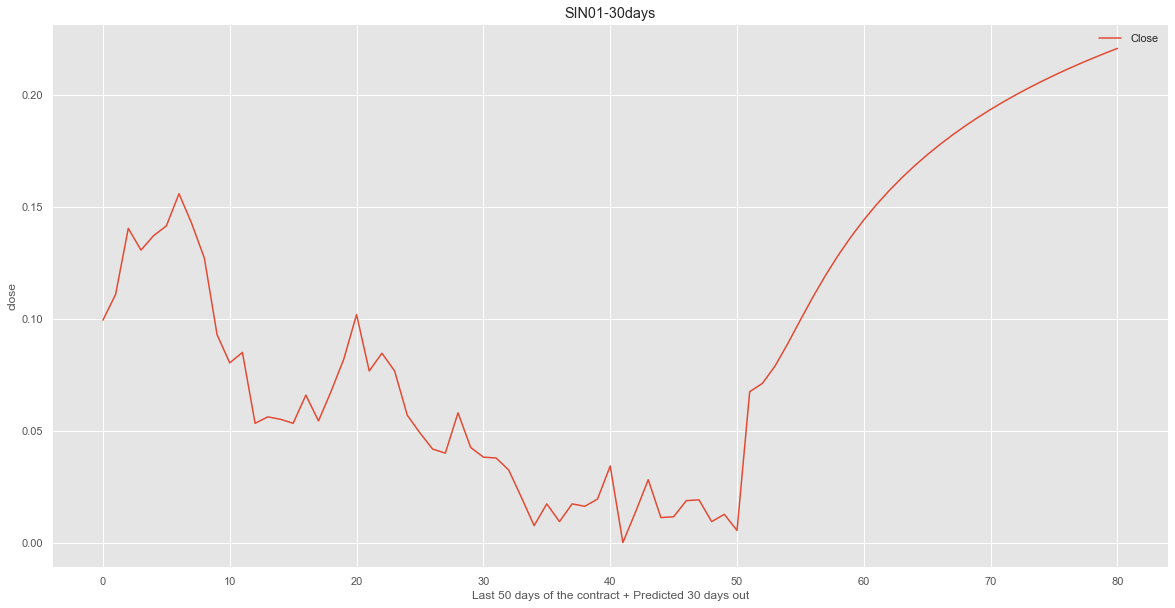

In [1228]:
df3=df2.tolist()
df3.extend(lst_output)

plt.plot(df3[1199:])
plt.title('SIN01-30days')
plt.legend(['Close'], loc='best')
plt.xlabel('Last 50 days of the contract + Predicted 30 days out')
plt.ylabel('close')
#plt.savefig('/Users/apple/Desktop/CZ15-30daysadd.jpg', dpi=300, bbox_inches='tight')

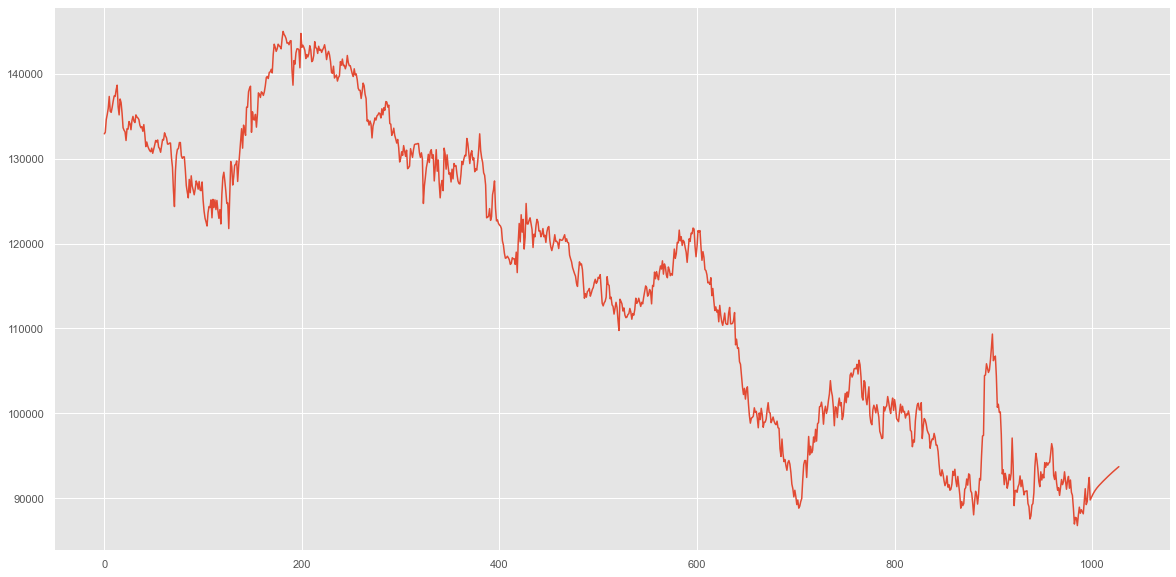

In [1197]:
from sklearn.preprocessing import StandardScaler
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
#plt.title('CZ15-30days')
#plt.legend(['Close'],loc ='best')
#plt.xlabel('Contract Length + 30 days out')
#plt.ylabel('Close')
#plt.savefig('/Users/apple/Desktop/CZ15-30daysadded.jpg', dpi=300, bbox_inches='tight')



In [1195]:
import pandas as pd
import numpy as np #for the random integer example
df4 = pd.DataFrame(np.random.randint(0.0,100.0,size=(998,1)),
              index=range(1,999),
              columns=['close'],
              dtype='float64')
df4

close
1     46.0
2     32.0
3     61.0
4     46.0
5     31.0
..     ...
994   90.0
995   63.0
996   40.0
997   38.0
998   51.0

[998 rows x 1 columns]

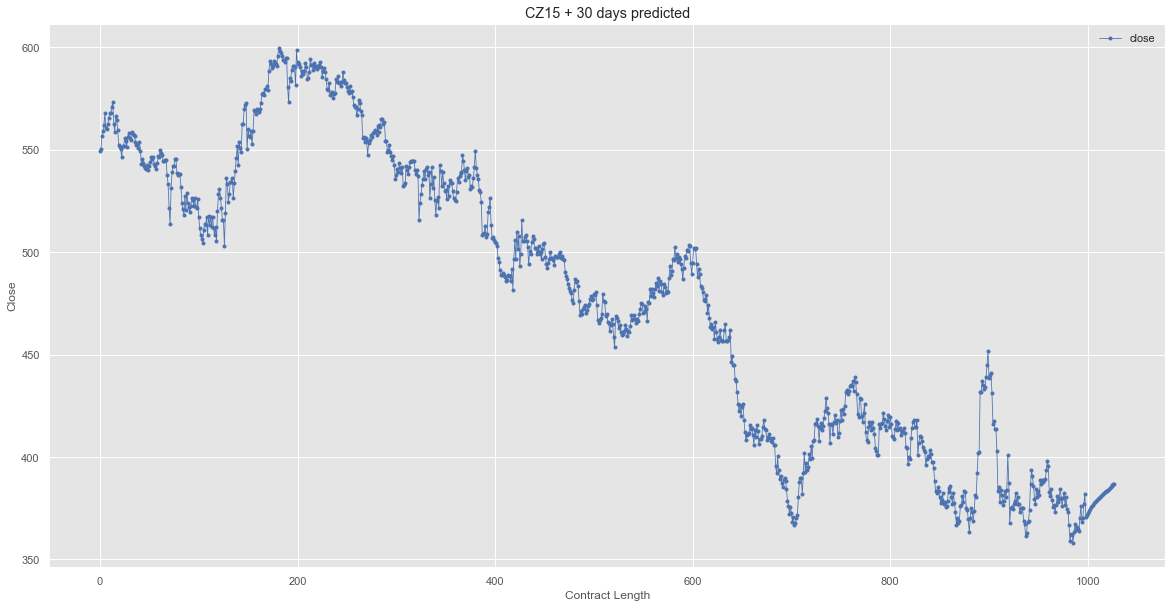

In [1196]:
from pandas import DataFrame
df4 = DataFrame(df3,columns=['close'])
df4['close'].plot(linewidth = 0.8, marker = '.' , color = 'b' ,linestyle = '-', label = 'close', legend = True,  title = 'CZ15 + 30 days predicted');
plt.ylabel('Close')
plt.xlabel('Contract Length')
#plt.savefig('/Users/apple/Desktop/CZ15-30daysaddedSLSTM.jpg', dpi=300, bbox_inches='tight')